# Plotting .WAV Files - 5/27

This notebook builds off the previous notebook, converting the loose code to a function that can be easily called multiple times. I'll be plotting four songs (two 70s blues rock songs, two 90s hip hop songs), as a proof of concept.

In [1]:
%matplotlib inline
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
from scipy.io import wavfile # get the api

In [2]:
songs = ["Dancing in the Moonlight.wav", 
         "Looking Glass - Brandy (You're a Fine Girl).wav", 
         "California Love (Original Version).wav",
         "Notorious b.i.g- big poppa (lyrics).wav"
        ]

In [35]:
def plotWAV(filename):
    fs, sig = wavfile.read(filename)
    
    # This song has two channels, so I just want the first (they are very similar)
    # If I tried to take the FFT of the entire signal it would never complete, so I needed to concatenate it slightly
    sig0 = sig.T[0][:len(sig) - int(len(sig)%10000)]

    time_step = 1/fs
    time_vec = np.arange(0, len(sig0)/fs, time_step)
    
    # The FFT of the signal
    sig_fft = fftpack.fft(sig0)

    # And the power (sig_fft is of complex dtype)
    power = np.abs(sig_fft)

    # The corresponding frequencies
    sample_freq = fftpack.fftfreq(len(sig_fft), d=time_step)
    
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle(filename[:len(filename)-4])
    #ax1.plot(x, y)
    #ax2.plot(x, -y)

    #ax1.figure(figsize=(6, 5))
    plt.xlabel('Time [sec]', axes=ax1)
    plt.ylabel('Power', axes=ax1)
    ax1.plot(time_vec, sig0, label='Original signal', axes=ax1)
    
    # Plot the FFT power
    #ax2.figure(figsize=(6, 5))
    ax2.plot(sample_freq, power)
    ax2.set_xlim(-20000, 20000)
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('power')
    
    plot_filename = filename[:len(filename)-4] + '1.png'
    
    print(plot_filename)
    
    plt.savefig(plot_filename)

In [36]:
def main():
    for i in songs:
        plotWAV(i)

Dancing in the Moonlight1.png
Looking Glass - Brandy (You're a Fine Girl)1.png
California Love (Original Version)1.png
Notorious b.i.g- big poppa (lyrics)1.png


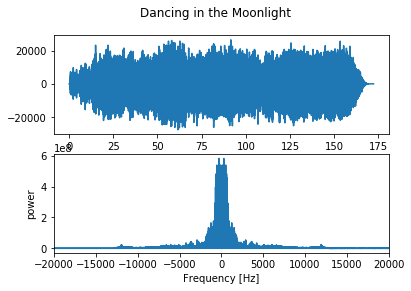

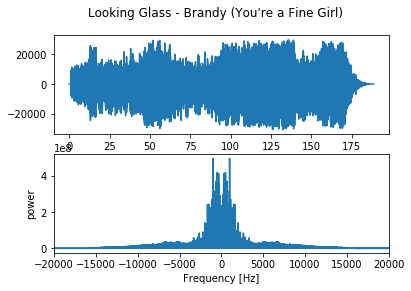

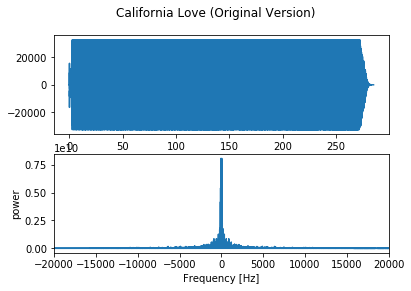

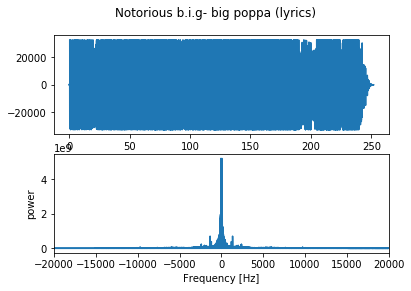

In [37]:
main()